# Tutorial 2 - Hilbert spaces

Hilbert spaces are complete inner product spaces. Within all inverse problems considered we will assume that both the model and data space are Hilbert spaces. This is a restriction, but one that is difficult to avoid in practice. The data space in any real inverse problem is necessarily finite dimensional and so can always be identified with $\mathbb{R}^{n}$ for some 
suitable $n \in \mathbb{N}$. In most cases of interest, however, the model space will be comprised of functions and be infinite-dimensional. Computationally we cannot deal directly with infinite-dimensional spaces, but we can ensure that we work with convergent discretisations. This means, roughly speaking, that the underlying mathematical problems are well-defined, and that the numerical methods can be shown to converge to the exact values as the size of the discretised model space is suitably increased.

In this tutorial we look into the representation of Hilbert spaces within the ```pygeoinf``` library through two examples. 
Hilbert spaces are represented by the ```HilbertSpace``` class. Importantly this class defines only the *structure* of the Hilbert space but its elements must be otherwise defined. To construct a class instance the user must provide the following data:

- The dimension of the space. 
- A mapping from elements of the space to a chosen co-ordinate representation. 
- A mapping from this co-ordinate representation to elements of the space. 
- The inner product for the space. 
- A mapping from elements of the space to their associated dual vector.
- A mapping from elements of the dual space into the their representation within the space. 

In the case of infinite-dimensional spaces, the dimension is understood as being that of an approximating space and the co-ordinate mappings describe projections and inclusions to and from this subspace. 


## Euclidean space

The simplest Hilbert space is Euclidean space, and this is implemented in ```pygeoinf``` as the class ```EuclideanSpace``` that is derived from the ```HilbertSpace``` class. Constructuion of an instance of this class requires only its dimension. 

In [ ]:
import numpy as np
import pygeoinf as inf

# Set up Euclidean space. 
dim = 4
X = inf.EuclideanSpace(dim)

# Print its dimension. 
print(f'Dimension of the vector space = {X.dim}')

Dimension of the vector space = 4


Elements of ```EuclideanSpace``` are just ```numpy``` vectors. In the following we generate a random element and get its components. For ```EuclideanSpace``` a vector and the vector of its components are the same. Note that the ```random``` method for ```HilbertSpaces``` internally generates a component vector drawn from a standard Gaussian distribution and then maps this to an element of the space. This method is only meant to provide a quick method for generating elements of the space for testing and is not suitable for more general use. 

In [11]:
# Generate a random element of the space and print its value. 
x = X.random()
print(f'The vector is equal to:               {x}')

# Now get its component vector, which in this case is the same thing. 
c = X.to_components(x)
print(f'The vector\'s components are equal to: {c}')

The vector is equal to:               [-1.29108494 -0.35987048  0.50892176 -0.18732475]
The vector's components are equal to: [-1.29108494 -0.35987048  0.50892176 -0.18732475]


If needed, we can access the zero vector is the space as follows:

In [12]:
# Generate a the zero vector -- note that this is a property of the class. 
x = X.zero
print(f'The vector is equal to:               {x}')

# Now get its component vector, which in this case is the same thing. 
c = X.to_components(x)
print(f'The vector\'s components are equal to: {c}')

The vector is equal to:               [0. 0. 0. 0.]
The vector's components are equal to: [0. 0. 0. 0.]


Given two element of the space, we can compute their inner product:

In [14]:
x1 = X.random()
x2 = X.random()
print(f'The first vector is:  {x1} ')
print(f'The second vector is: {x2} ')
print(f'Their inner product is equal to: {X.inner_product(x1, x2)}')

The first vector is:  [-0.63684423  0.03762147 -1.00807653 -1.22906361] 
The second vector is: [-0.3336524  -0.45716905  0.32612383  2.15213848] 
Their inner product is equal to: -2.778587637712648


The inner product defines a norm, and we can access this as follows:

In [15]:
x = X.random()
print(f'The vector is equal to: {x}')
print(f'The vector has norm: {X.norm(x)}')
print(f'The vector has norm: {X.squared_norm(x)}')

The vector is equal to: [-2.63662479 -1.00566755 -0.4748808   0.24008213]
The vector has norm: 2.8716386749588314
The vector has norm: 8.246308679519313


We can use these methods to verify that standard Hilbert space inequalities are satified. 

In [17]:
x1 = X.random()
x2 = X.random()
print(f"The first vector is:  {x1} ")
print(f"The second vector is: {x2} ")

print(
    f"The triangle inequality, |x1 + x2| <= |x1| + |x2|, is {X.norm(x1+x2) <= X.norm(x1) + X.norm(x2)}."
)

print(
    f"The Cauchy-Scwharz inequality, |(x1,x2)| <= |x1||x2|, is {np.abs(X.inner_product(x1,x2)) <= X.norm(x1) * X.norm(x2)}."
)


The first vector is:  [-0.86539038  0.63182183  0.51723632 -0.1341333 ] 
The second vector is: [ 0.66877879  1.73254009  1.91890527 -0.43908291] 
The triangle inequality, |x1 + x2| <= |x1| + |x2|, is True.
The Cauchy-Scwharz inequality, |(x1,x2)| <= |x1||x2|, is True.


For ```HilbertSpaces``` whose elements have the standard vector operations already overloaded, as is the case here, we can directly add, subtract or scalar multiply them. 

Such operations are also available through methods within the ```HilbertSpace``` class. For example

In [28]:
x1 = X.random()
x2 = X.random()  
print(f"\nThe first vector is:            {x1} ")
print(f"The second vector is:           {x2} ")

x3 = X.add(x1,x2)
print(f"The sum of the vectors is:      {x3} ")

print(f"The first vector times by 2 is: {X.multiply(2,x1)} ")

x4 = X.copy(x3)
print(f"A copy of the third vector is:  {X.multiply(2,x1)} ")




The first vector is:            [1.44472617 0.94406633 0.10145783 0.91822969] 
The second vector is:           [-1.04103372  0.25443486  0.06872167 -0.98156233] 
The sum of the vectors is:      [ 0.40369246  1.19850119  0.1701795  -0.06333265] 
The first vector times by 2 is: [2.88945235 1.88813266 0.20291566 1.83645937] 
A copy of the third vector is:  [2.88945235 1.88813266 0.20291566 1.83645937] 


Custom implementation for these operations can be provided when a ```HilbertSpace``` is constructed, and only these methods are used internally. This allows for ```HilbertSpaces``` to be formed from objects that do not have the necessary overloads defined. This is needed, for example, when we consider direct sums of Hilbert spaces, with the elements in such cases modelled as lists of elements of the constituent spaces. 

The ```HilbertSpace``` class also provides convenient methods for generating certain element of the space. For example, if we want a particular basis vector we write:

In [29]:
i = 2
x = X.basis_vector(2)
print(f"The {i}th basis vector is: {x} ")

The 2th basis vector is: [0. 0. 1. 0.] 


## Sobolev spaces on an interval

Within the inverse problem within Tutorial 1, the data space was represented by an instance of ```EuclideanSpace```. The model space was, however, represented by a more elaborate instance of the ```HilbertSpace``` class called ```Sobolev``` and contained within the sub-package ```homogeneous_space.line```. This class describes the structure of the Sobolev space $H^{s}(I)$ with **exponent**, $s\in \mathbb{R}$, of periodic functions on an interval, $I = [x_{0},x_{1}]$. 

### Mathematical definitions

A sufficiently regular function, $u$, on this domain admits the Fourier series expansion
$$
u(x) = \sum_{k = -\infty}^{\infty} u_{k} \phi_{k}(x), 
$$
where the basis vectors are defined by 
$$
\phi_{k}(x) = \frac{1}{\sqrt{x_{1}-x_{0}}}\mathrm{e}^{2\pi \mathrm{i} \frac{x-x_{0}}{x_{1}-x_{0}}}, 
$$
and the expansion coeffients are given by 
$$
u_{k} = \int_{x_{0}}^{x_{1}} u\, \phi_{k} \,\mathrm{d} x.
$$
Because we deal only with real functions, the symmetry $u_{-k} = \overline{u_{k}}$ holds, and hence we need in practice 
only consider coefficients for non-negative $k$.  Using this expansion, we define the $H^{s}(I)$ inner product by
$$
(u,v)_{H^{s}(I)} = \sum_{k=-\infty}^{\infty}\left[
    1 + \left(\frac{2\pi \lambda k}{x_{1}-x_{0}}\right)^{2}
    \right]^{s}\overline{u}_{k}v_{k}, 
$$
where $\lambda$ is a chosen characteristic **length-scale**. An informal definition of $H^{s}(I)$ is the space of periodic functions on $I$ with finite-norm relative to this inner product. In a bit more detail, the above Fourier expansion is valid in the space of distributions, $\mathcal{D}'(I)$ on the interval defined relative to smooth periodic test functions. We can then define $H^{s}(I)$ to be the subspace within $\mathcal{D}'(I)$ that have finite-norm.

 An equivalent definition can be provided in terms of the Laplacian
on $I$ that is defined by 
$$
\Delta = -\frac{\mathrm{d}^{2}}{\mathrm{d} x^{2}},
$$
noting that we apply the "geometer's" sign convention. On the level of the Fourier coefficients, the action of this operator takes the form
$$
\Delta u = \sum_{k=-\infty}^{\infty} \left(\frac{2\pi k}{x_{1}-x_{0}}\right)^{2}
    u_{k} \phi_{k}. 
$$
This allows us to write the Sobolev inner product in terms of the familiar $L^{2}(I)$ inner product:
$$
(u,v)_{H^{s}(I)} = \left((1+\lambda^{2}\Delta)^{s/2} u, (1+\lambda^{2}\Delta)^{s/2} v \right)_{L^{2}(I)}
$$
and to then characterise the space precisely through
$$
H^{s}(I) = \{ u \in \mathcal{D}'(I) \,|\, (1+\lambda^{2}\Delta)^{s/2}u \in L^{2}(I)\}. 
$$
Clearly we have the inclusions
$$
H^{s}(I) \subseteq H^{t}(I), 
$$
for $s \ge t$ which may be shown to be compact. The Sobolev embedding theorem also shows that there is a continuous embedding
$$
H^{s}(I) \subseteq C^{k}(I), 
$$
when $s > 1/2 + k$, with $C^{k}(I)$ the Banach space of $k$-times continuously differential functions. 

### Practical implementation

Within the ```Sobolev``` class from ```homogeneous_space.line```, elements are represented by ```numpy``` vectors of points values defined on an equally spaced grid. This allows for the use of FFTs to efficiently pass into the Fourier domain and hence compute the inner product. In detail, a real FFT is used, and the components of a function comprise the real and imaginary parts of the Fourier coefficients for non-negative indices. From the user's perspective, however, these details are hidden, and elements of this space can be manipulated in an identical way to that done above for ```EuclideanSpace```. 

First, we construct an instance of this class. 



In [39]:
# Import the class from the sub-package. 
from pygeoinf.homogeneous_space.line import  Sobolev

# Set the interval properties. The spacing of points
# in the spatial grid is set by dx. 
x0 = 0
x1 = 1
dx = 0.001

# Set the exponent and length-scale
exponent = 2
scale = 0.1

# Set the Sobolev space. 
Y = Sobolev(x0, x1, dx, exponent, scale)

print(f'The approximating space has dimension: {Y.dim}')


The approximating space has dimension: 1000


We can then generate and plot some of the basis vectors. 

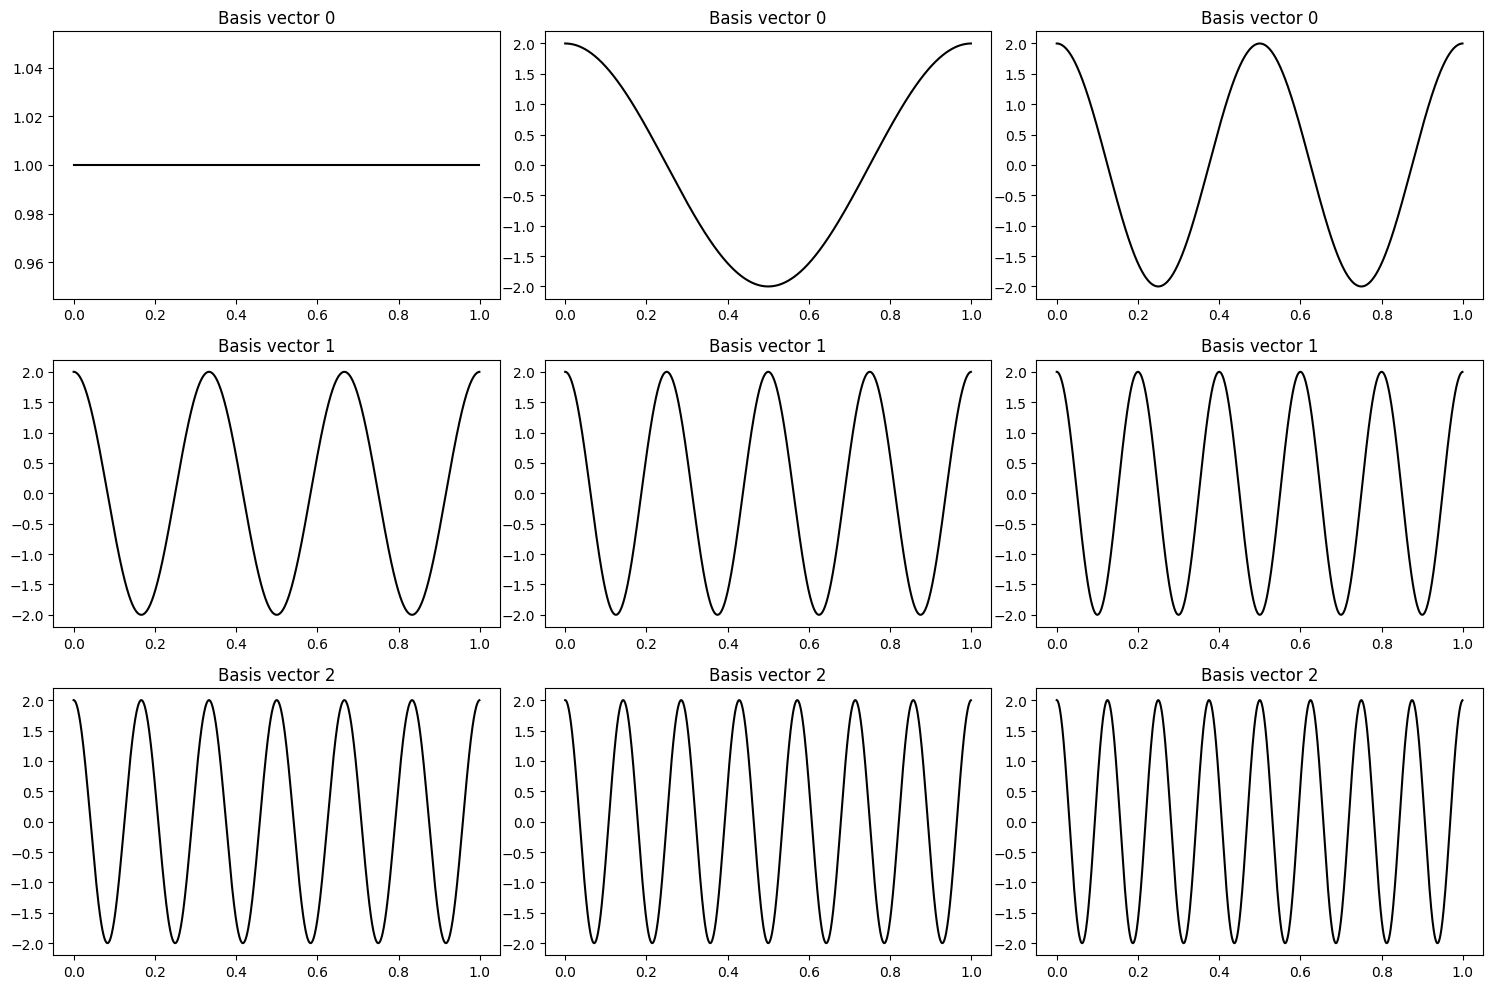

In [59]:
# Import matplotlib for plotting. 
import matplotlib.pyplot as plt
from matplotlib import cm 

# Plot the first m * m basis vectors. 
m = 3
fig, axs = plt.subplots(m, m, figsize=(15,10))


for i in range(m):
    for j in range(m):
        ax = axs[i, j]
        k = j + m * i
        u = Y.basis_vector(k)
        Y.plot(u, fig=fig, ax=ax, color='k')
        ax.set_title(f'Basis vector {i}')

plt.tight_layout()
plt.show()


Note that all the terms shown are cosine functions. This is because the component vectors store first all the real Fourier coefficients and then the imaginary parts. 

The basis vectors are orthonormal on $L^{2}(I)$ but only orthogonal on $H^{s}(I)$. This is seen in the following:

In [57]:
# Get a pair of basis vectors. 
i = 4
j = 7
u1 = Y.basis_vector(i)
u2 = Y.basis_vector(j)

# Print their norms and inner product. 
print(f'The norm of u1 is :                 {Y.norm(u1)}')
print(f'The norm of u2 is :                 {Y.norm(u2)}')
print(f'The inner product of u1 and u2 is : {Y.inner_product(u1,u2)}')

The norm of u1 is :                 10.347159737910859
The norm of u2 is :                 28.7713612249575
The inner product of u1 and u2 is : 2.366545460364839e-15
